# Movie Recommender System

In [1]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import time
from sklearn.utils import resample
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\prave\Downloads\archive (1)\IMDb movies.csv")
df1=pd.read_csv(r"C:\Users\prave\Downloads\archive (1)\IMDb movies.csv")

In [3]:
print('size of dataset = ',len(df))
print('number of columns in dataset = ',len(df.columns))

size of dataset =  85855
number of columns in dataset =  22


In [4]:
df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [5]:
df.tail()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
85850,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398,NaN,NaN,$ 3507171,NaN,NaN,4.0
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724,NaN,NaN,$ 7299062,NaN,6.0,4.0
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265,NaN,NaN,NaN,NaN,NaN,NaN
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194,NaN,NaN,$ 2833,NaN,NaN,NaN
85854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,2020-02-05,Drama,74,Spain,Catalan,Laura Jou,...,"Maria Morera Colomer, Biel Rossell Pelfort, Is...","Pep, a 13-year-old boy, is in love with a girl...",6.7,102,NaN,NaN,$ 59794,NaN,NaN,2.0


In [6]:
df.drop(['metascore','country','writer','production_company','description','budget','usa_gross_income',
         'worlwide_gross_income','metascore','reviews_from_users','reviews_from_critics','title','original_title',
        'date_published','actors','imdb_title_id'],axis=1,inplace=True)

In [7]:
df.head()

,year,genre,duration,language,director,avg_vote,votes
0,1894,Romance,45,None,Alexander Black,5.9,154
1,1906,"Biography, Crime, Drama",70,None,Charles Tait,6.1,589
2,1911,Drama,53,NaN,Urban Gad,5.8,188
3,1912,"Drama, History",100,English,Charles L. Gaskill,5.2,446
4,1911,"Adventure, Drama, Fantasy",68,Italian,"Francesco Bertolini, Adolfo Padovan",7.0,2237


In [8]:
df.isnull().sum()

year          0
genre         0
duration      0
language    833
director     87
avg_vote      0
votes         0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

year        0
genre       0
duration    0
language    0
director    0
avg_vote    0
votes       0
dtype: int64

In [11]:
df.dtypes

year         object
genre        object
duration      int64
language     object
director     object
avg_vote    float64
votes         int64
dtype: object

In [12]:
df['year'].unique()

array([1894, 1906, 1912, 1911, 1919, 1913, 1914, 1915, 1916, 1917, 1918,
       1920, 1921, 1924, 1922, 1923, 1925, 1926, 1935, 1927, 1928, 1983,
       1929, 1930, 1931, 1932, 1937, 1938, 1933, 1934, 1936, 1940, 1939,
       1942, 1943, 1941, 1948, 1944, 2001, 1946, 1945, 1947, 1973, 1949,
       1950, 1952, 1951, 1962, 1953, 1954, 1955, 1961, 1956, 1958, 1957,
       1959, 1960, 1963, 1965, 1971, 1964, 1966, 1968, 1967, 1969, 1976,
       1970, 1979, 1972, 1981, 1978, 2000, 1989, 1975, 1974, 1986, 1990,
       2018, 1977, 1982, 1980, 1993, 1984, 1985, 1988, 1987, 2005, 1991,
       2002, 1994, 1992, 1995, 2017, 1997, 1996, 2006, 1999, 1998, 2007,
       2008, 2003, 2004, 2010, 2009, 2011, 2013, 2012, 2016, 2015, 2014,
       2019, 2020, '2012', '2015', '2009', '2013', '2018', '2014', '2017',
       '2011', '2016', '1981', '1975', '2010', '1984', '2007', '2006',
       '2001', '2004', '1979', '2019', '1967', '1978', '2003', '2005',
       '1969', '1990', '1983', '2002', '1996', '2008'

In [13]:
df.replace({'TV Movie 2019':'2019'},inplace=True)

In [14]:
df['year'] = df['year'].apply(pd.to_numeric)

In [15]:
df['year'].unique()

array([1894, 1906, 1912, 1911, 1919, 1913, 1914, 1915, 1916, 1917, 1918,
       1920, 1921, 1924, 1922, 1923, 1925, 1926, 1935, 1927, 1928, 1983,
       1929, 1930, 1931, 1932, 1937, 1938, 1933, 1934, 1936, 1940, 1939,
       1942, 1943, 1941, 1948, 1944, 2001, 1946, 1945, 1947, 1973, 1949,
       1950, 1952, 1951, 1962, 1953, 1954, 1955, 1961, 1956, 1958, 1957,
       1959, 1960, 1963, 1965, 1971, 1964, 1966, 1968, 1967, 1969, 1976,
       1970, 1979, 1972, 1981, 1978, 2000, 1989, 1975, 1974, 1986, 1990,
       2018, 1977, 1982, 1980, 1993, 1984, 1985, 1988, 1987, 2005, 1991,
       2002, 1994, 1992, 1995, 2017, 1997, 1996, 2006, 1999, 1998, 2007,
       2008, 2003, 2004, 2010, 2009, 2011, 2013, 2012, 2016, 2015, 2014,
       2019, 2020], dtype=int64)

In [16]:
bad = list(df[df['avg_vote']<5].index)
good = list(df[df['avg_vote']>=5].index)
df.loc[bad,'avg_vote'] = 'bad'
df.loc[good,'avg_vote'] = 'good'

In [17]:
none = list(df[df['language']=='None'].index)
df.loc[none,'language'] = np.nan

In [18]:
df.isnull().sum()

year         0
genre        0
duration     0
language    68
director     0
avg_vote     0
votes        0
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df.dtypes

year         int64
genre       object
duration     int64
language    object
director    object
avg_vote    object
votes        int64
dtype: object

In [21]:
df['avg_vote'].value_counts()

good    67981
bad     16897
Name: avg_vote, dtype: int64

# label encoding dataset

In [22]:
types=list(df.dtypes)
cols=list(df.columns)

In [23]:
le = preprocessing.LabelEncoder()
for i in range(len(cols)):
    if(types[i]==object):
        df[cols[i]]= le.fit_transform(df[cols[i]])

In [24]:
df.dtypes

year        int64
genre       int32
duration    int64
language    int32
director    int32
avg_vote    int32
votes       int64
dtype: object

In [25]:
df['avg_vote'].value_counts()

1    67981
0    16897
Name: avg_vote, dtype: int64

In [26]:
df

,year,genre,duration,language,director,avg_vote,votes
3,1912,764,100,525,5067,1,446
4,1911,222,68,2835,9811,1,2237
5,1912,426,60,525,29444,1,484
6,1919,435,85,2290,9189,1,753
7,1913,764,120,2835,8910,1,273
...,...,...,...,...,...,...,...
85850,2020,464,95,1929,19390,1,398
85851,2020,492,103,2309,15363,1,724
85852,2019,696,130,3216,32794,1,265
85853,2019,729,98,4254,493,1,194


In [27]:
df['avg_vote'].value_counts()

1    67981
0    16897
Name: avg_vote, dtype: int64

In [28]:
x=df.drop(['avg_vote'], axis = 1)
y=df['avg_vote']

# train test split

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x, y, test_size=0.2, random_state=1)

In [30]:
ytrain.value_counts()

1    54415
0    13487
Name: avg_vote, dtype: int64

In [31]:
ytest.value_counts()

1    13566
0     3410
Name: avg_vote, dtype: int64

In [32]:
x=xtest
y=ytest
xtest,xval,ytest,yval=train_test_split(x, y, test_size=0.001, random_state=1)

# downsampling the majority class

In [33]:
x = pd.concat([xtrain,ytrain], axis=1)

In [34]:
bad=x[x['avg_vote']==0]
good = x[x['avg_vote']==1]

In [35]:
n=len(good)
downsampled = resample(good,replace = False,n_samples = int(n/2),random_state = 27)
downsampled = pd.concat([bad,downsampled])

In [36]:
downsampled['avg_vote'].value_counts()

1    27207
0    13487
Name: avg_vote, dtype: int64

# upsampling the minority class

In [37]:
downsampled['avg_vote'].value_counts()

1    27207
0    13487
Name: avg_vote, dtype: int64

In [38]:
bad=downsampled[downsampled['avg_vote']==0]
good=downsampled[downsampled['avg_vote']==1]
bad_len=len(downsampled[downsampled['avg_vote']==0])
upsampled = resample(bad,replace=True,n_samples=bad_len*2,random_state=27)
upsampled = pd.concat([good, upsampled])


In [39]:
upsampled['avg_vote'].value_counts()

1    27207
0    26974
Name: avg_vote, dtype: int64

# splitting dataset after upsampling and downsampling

In [40]:
xtrain=upsampled.drop(['avg_vote'],axis=1)
ytrain=upsampled['avg_vote']

# training model using bagging

In [41]:
from sklearn.ensemble import BaggingClassifier

# logistic regression

In [42]:
lr= BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=19, random_state=0).fit(xtrain,ytrain)

In [43]:
lr_accuracy=lr.score(xtest,ytest)
print(lr_accuracy)

0.586944984963736


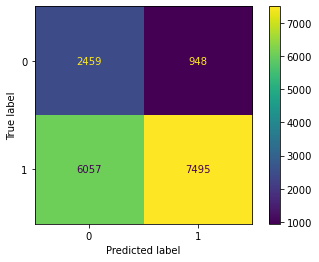

In [44]:
plot_confusion_matrix(lr, xtest, ytest)
plt.show()

In [45]:
ypredict=lr.predict(xtest)

In [46]:
print('f1 score = ',f1_score(ytest, ypredict, average="macro"))
print('precision = ',precision_score(ytest, ypredict, average="macro"))
print('recall = ',recall_score(ytest, ypredict, average="macro"))

f1 score =  0.5469993037272946
precision =  0.588234111520757
recall =  0.6374021196203802


In [47]:
lr_f1score = f1_score(ytest, ypredict, average="macro")
lr_precision = precision_score(ytest, ypredict, average="macro")
lr_recall = recall_score(ytest, ypredict, average="macro")

# decision tree

In [48]:
dt = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(),n_estimators=19, random_state=0).fit(xtrain,ytrain)

In [49]:
dt_accuracy=dt.score(xtest,ytest)
print(dt_accuracy)

0.8141989504098119


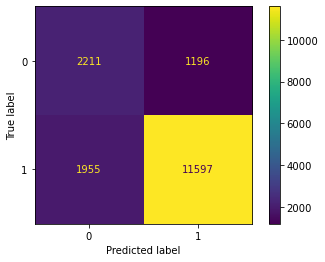

In [50]:
plot_confusion_matrix(dt, xtest, ytest)
plt.show()

In [51]:
ypredict=dt.predict(xtest)

In [52]:
print('f1 score = ',f1_score(ytest, ypredict, average="macro"))
print('precision = ',precision_score(ytest, ypredict, average="macro"))
print('recall = ',recall_score(ytest, ypredict, average="macro"))

f1 score =  0.7321556537184963
precision =  0.718618144696945
recall =  0.7523494388246437


In [53]:
dt_f1score = f1_score(ytest, ypredict, average="macro")
dt_precision = precision_score(ytest, ypredict, average="macro")
dt_recall = recall_score(ytest, ypredict, average="macro")

# k nearest neighbour

In [54]:
knn = BaggingClassifier(base_estimator=KNeighborsClassifier(),n_estimators=19, random_state=0).fit(xtrain,ytrain)

In [55]:
knn_accuracy=knn.score(xtest,ytest)
print(knn_accuracy)

0.676631876879533


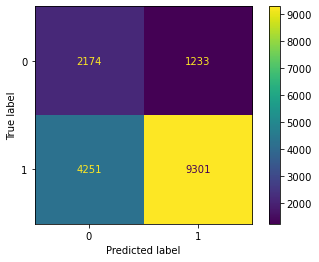

In [56]:
plot_confusion_matrix(knn, xtest, ytest)
plt.show()

In [57]:
ypredict=knn.predict(xtest)

In [58]:
print('f1 score = ',f1_score(ytest, ypredict, average="macro"))
print('precision = ',precision_score(ytest, ypredict, average="macro"))
print('recall = ',recall_score(ytest, ypredict, average="macro"))

f1 score =  0.6072726614902513
precision =  0.6106581024645783
recall =  0.6622086979581243


In [59]:
knn_f1score = f1_score(ytest, ypredict, average="macro")
knn_precision = precision_score(ytest, ypredict, average="macro")
knn_recall = recall_score(ytest, ypredict, average="macro")

# naive bayes

In [60]:
nb = BaggingClassifier(base_estimator=GaussianNB(),n_estimators=19, random_state=0).fit(xtrain,ytrain)

In [61]:
nb_accuracy = nb.score(xtest,ytest)
print(nb_accuracy)

0.4201898696857126


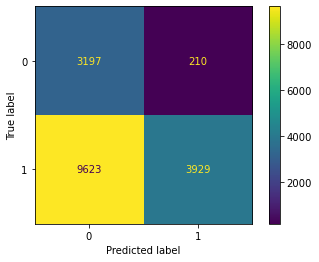

In [62]:
plot_confusion_matrix(nb, xtest, ytest)
plt.show()

In [63]:
ypredict=nb.predict(xtest)

In [64]:
print('f1 score = ',f1_score(ytest, ypredict, average="macro"))
print('precision = ',precision_score(ytest, ypredict, average="macro"))
print('recall = ',recall_score(ytest, ypredict, average="macro"))

f1 score =  0.4191076452332281
precision =  0.5993195410348426
recall =  0.6141412512228279


In [65]:
nb_f1score = f1_score(ytest, ypredict, average="macro")
nb_precision = precision_score(ytest, ypredict, average="macro")
nb_recall = recall_score(ytest, ypredict, average="macro")

# support vector machine

In [66]:
from sklearn import svm
svm1 = svm.SVC()
svm = BaggingClassifier(base_estimator=svm1,n_estimators=5, random_state=0).fit(xtrain,ytrain)

In [67]:
svm_accuracy=svm.score(xtest,ytest)
print(svm_accuracy)

0.5826994516186096


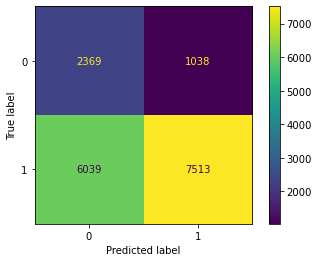

In [68]:
plot_confusion_matrix(svm, xtest, ytest)
plt.show()

In [69]:
ypredict=svm.predict(xtest)

In [70]:
print('f1 score = ',f1_score(ytest, ypredict, average="macro"))
print('precision = ',precision_score(ytest, ypredict, average="macro"))
print('recall = ',recall_score(ytest, ypredict, average="macro"))

f1 score =  0.5404164387218852
precision =  0.5801830798941727
recall =  0.6248581272704401


In [71]:
svm_f1score = f1_score(ytest, ypredict, average="macro")
svm_precision = precision_score(ytest, ypredict, average="macro")
svm_recall = recall_score(ytest, ypredict, average="macro")

# random forest classifier

In [72]:
rf = RandomForestClassifier(n_estimators = 19)

In [73]:
rf.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=19)

In [74]:
rf_accuracy=rf.score(xtest,ytest)
print(rf_accuracy)

0.8173831004186568


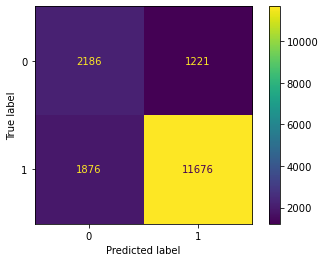

In [75]:
plot_confusion_matrix(rf, xtest, ytest)
plt.show()

In [76]:
ypredict=rf.predict(xtest)

In [77]:
print('f1 score = ',f1_score(ytest, ypredict, average="macro"))
print('precision = ',precision_score(ytest, ypredict, average="macro"))
print('recall = ',recall_score(ytest, ypredict, average="macro"))

f1 score =  0.734129758845288
precision =  0.7217426813902996
recall =  0.7515952208263492


In [78]:
rf_f1score = f1_score(ytest, ypredict, average="macro")
rf_precision = precision_score(ytest, ypredict, average="macro")
rf_recall = recall_score(ytest, ypredict, average="macro")

# graph /comparison and results

In [79]:
models=['logistic regression','decision tree','knn','naive bayes','svm','random forest classifier']
accuracy=[lr_accuracy,dt_accuracy,knn_accuracy,nb_accuracy,svm_accuracy,rf_accuracy]
precision=[lr_precision,dt_precision,knn_precision,nb_precision,svm_precision,rf_precision]
recall=[lr_recall,dt_recall,knn_recall,nb_recall,svm_recall,rf_recall]
f1score=[lr_f1score,dt_f1score,knn_f1score,nb_f1score,svm_f1score,rf_f1score]

# accuracy graph

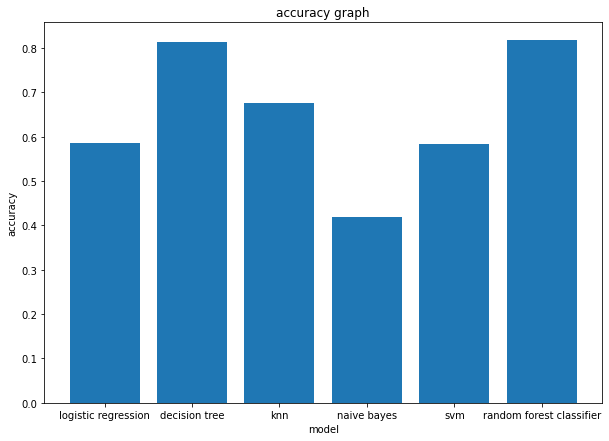

In [80]:
fig = plt.figure(figsize =(10, 7))
plt.bar(models, accuracy)
plt.xlabel("model")
plt.ylabel("accuracy")
plt.title("accuracy graph")
plt.show()

# precision graph

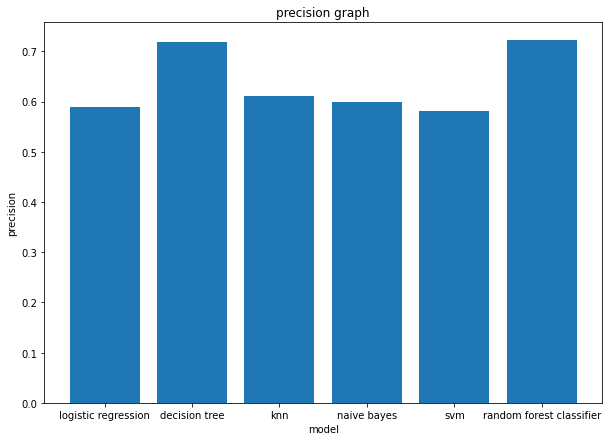

In [81]:
fig = plt.figure(figsize =(10, 7))
plt.bar(models, precision)
plt.xlabel("model")
plt.ylabel("precision")
plt.title("precision graph")
plt.show()

# recall graph

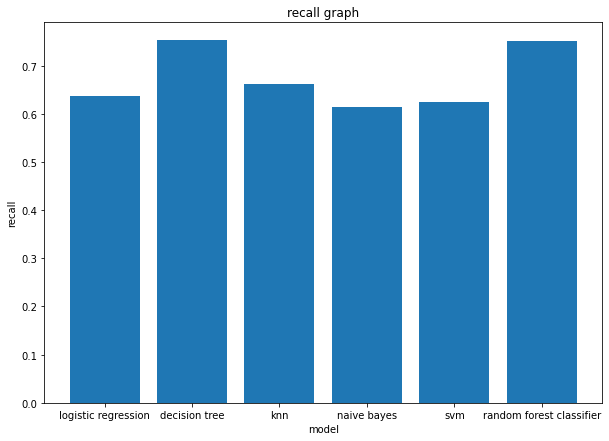

In [82]:
fig = plt.figure(figsize =(10, 7))
plt.bar(models, recall)
plt.xlabel("model")
plt.ylabel("recall")
plt.title("recall graph")
plt.show()

# f1 score graph

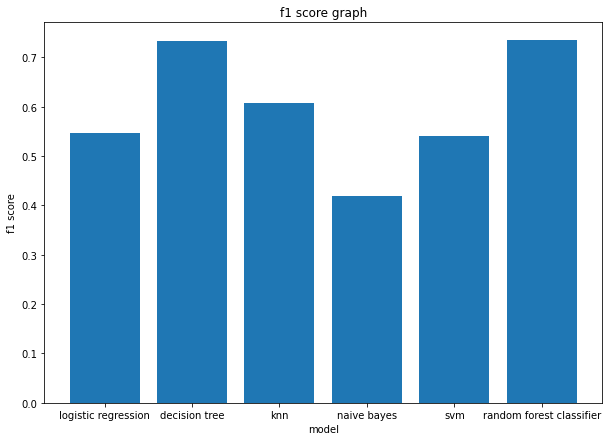

In [83]:
fig = plt.figure(figsize =(10, 7))
plt.bar(models, f1score)
plt.xlabel("model")
plt.ylabel("f1 score")
plt.title("f1 score graph")
plt.show()

# as we can see from the graph accuracy, precision and recall is the highest for random forest classifier.


# hence that is the best model for our project.

# final prediction

In [84]:
val_df=pd.concat([xval,yval],axis=1)

In [85]:
val_df

,year,genre,duration,language,director,votes,avg_vote
36814,1989,818,113,3216,3584,177,1
73512,2018,696,123,680,33568,4870,1
19799,1982,64,81,3265,1979,160,1
56945,2009,696,88,1737,12664,645,1
65630,2015,0,78,525,21089,167,0
4146,1942,464,80,2739,8817,259,1
39059,2000,578,94,3231,12625,215,1
40505,1967,164,100,4254,30708,346,1
46047,2005,1207,85,1488,33212,111273,1
30285,1996,146,100,525,20554,213,0


In [86]:
index=list(val_df.index)
movie=[]
for i in index:
    movie.append(df1.iloc[i,1])

In [87]:
print(movie)

['Ulsavapittennu', 'La mia vita con John F. Donovan', 'Bruce Lee vive ancora', 'Miss Kicki', '11 Blocks', 'Egy bolond százat csinál', 'Yun zhuan shou zhi lian', 'Malkoçoglu - krallara karsi', 'Red Eye', 'Warhead', 'Maman est chez le coiffeur', 'Distruggete DC 59, da base spaziale a Hong Kong', 'Ha-Hesder', 'Undermind', 'Psycho Beach Party', 'Il seme della violenza', 'O Guerreiro Didi e a Ninja Lili']


In [88]:
val_df['avg_vote'].value_counts()

1    14
0     3
Name: avg_vote, dtype: int64

In [89]:
final_predict=rf.predict(xval)

In [90]:
print(list(final_predict),'predicted output')
print(list(yval),'actual output')

[1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0] predicted output
[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0] actual output


In [91]:
df2=pd.DataFrame({'movie':movie,'actual':list(yval),'predicted':list(final_predict)})
df2

,movie,actual,predicted
0,Ulsavapittennu,1,1
1,La mia vita con John F. Donovan,1,1
2,Bruce Lee vive ancora,1,0
3,Miss Kicki,1,1
4,11 Blocks,0,0
5,Egy bolond százat csinál,1,1
6,Yun zhuan shou zhi lian,1,1
7,Malkoçoglu - krallara karsi,1,1
8,Red Eye,1,1
9,Warhead,0,0


In [92]:
print('actual output')
print('0   ',list(yval).count(0))
print('1   ',list(yval).count(1))

actual output
0    3
1    14


In [93]:
print('predicted output')
print('0   ',list(final_predict).count(0))
print('1   ',list(final_predict).count(1))

predicted output
0    5
1    12


In [96]:
print('recommended movies \n\n')
recommend=list(df2[df2['predicted']==1]['movie'])
for i in recommend:
    print(i)

recommended movies 


Ulsavapittennu
La mia vita con John F. Donovan
Miss Kicki
Egy bolond százat csinál
Yun zhuan shou zhi lian
Malkoçoglu - krallara karsi
Red Eye
Maman est chez le coiffeur
Distruggete DC 59, da base spaziale a Hong Kong
Ha-Hesder
Psycho Beach Party
Il seme della violenza


Based on duration,year,genre,director and vote our model recommends the given output.